<a href="https://colab.research.google.com/github/Adibatwt/pwd-classification/blob/Trial/Password_strength_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas scikit-learn matplotlib seaborn joblib streamlit


In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('password_strength.csv')


print("Dataset loaded. Rows:", len(df))
df.head(10)

Saving password_strength.csv to password_strength.csv


/tmp/ipython-input-1330077472.py:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('password_strength.csv')


Dataset loaded. Rows: 669870


,password,strength,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,kzde5577,1,NaN,NaN,NaN,NaN,NaN
1,kino3434,1,NaN,NaN,NaN,NaN,NaN
2,visi7k1yr,1,NaN,NaN,NaN,NaN,NaN
3,megzy123,1,NaN,NaN,NaN,NaN,NaN
4,lamborghin1,1,NaN,NaN,NaN,NaN,NaN
5,AVYq1lDE4MgAZfNt,2,NaN,NaN,NaN,NaN,NaN
6,u6c8vhow,1,NaN,NaN,NaN,NaN,NaN
7,v1118714,1,NaN,NaN,NaN,NaN,NaN
8,universe2908,1,NaN,NaN,NaN,NaN,NaN
9,as326159,1,NaN,NaN,NaN,NaN,NaN


In [4]:

print(df.columns)
print(df.isnull().sum())


df = df.dropna(subset=['password', 'strength']).reset_index(drop=True)


if df['strength'].dtype == object:

    mapping = {'weak':0, 'medium':1, 'strong':2}
    df['strength'] = df['strength'].map(mapping)

print("Class distribution:\n", df['strength'].value_counts())

Index(['password', 'strength', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
password           1
strength           0
Unnamed: 2    669642
Unnamed: 3    669639
Unnamed: 4    669639
Unnamed: 5    669869
Unnamed: 6    669869
dtype: int64
Class distribution:
 Series([], Name: count, dtype: int64)


In [5]:
from google.colab import files

print("Please upload weak_passwords.csv, medium_passwords.csv, strong_passwords.csv, and mixed_passwords.csv")
uploaded_custom_files = files.upload()
import pandas as pd


df = pd.read_csv("password_strength.csv")


weak_df   = pd.read_csv("weak_passwords.csv")
medium_df = pd.read_csv("medium_passwords.csv")
strong_df = pd.read_csv("strong_passwords.csv")
mixed_df  = pd.read_csv("mixed_passwords.csv")


cols_needed = ["password", "strength"]
weak_df   = weak_df[cols_needed]
medium_df = medium_df[cols_needed]
strong_df = strong_df[cols_needed]
mixed_df  = mixed_df[cols_needed]


my_df = pd.concat([weak_df, medium_df, strong_df, mixed_df], ignore_index=True)


original_count = len(df)
df = pd.concat([df, my_df], ignore_index=True)

print("Original:", original_count)
print("Custom added:", len(my_df))
print("New total:", len(df))


Please upload weak_passwords.csv, medium_passwords.csv, strong_passwords.csv, and mixed_passwords.csv


Saving medium_passwords.csv to medium_passwords.csv
Saving mixed_passwords.csv to mixed_passwords.csv
Saving strong_passwords.csv to strong_passwords.csv
Saving weak_passwords.csv to weak_passwords.csv
Original: 669870
Custom added: 42
New total: 669912


/tmp/ipython-input-821558334.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("password_strength.csv")


In [6]:
df = df[['password', 'strength']].copy()


df['strength'] = pd.to_numeric(df['strength'], errors='coerce')


df = df.dropna(subset=['password', 'strength']).reset_index(drop=True)


y = df['strength'].astype(int)
X = df['password'].astype(str)


tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(X)



In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.20, random_state=42, stratify=y
)


svm = LinearSVC()
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))



Accuracy: 0.9189463624417632

Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74     17943
           1       0.92      0.98      0.95     99362
           2       0.98      0.85      0.91     16631

    accuracy                           0.92    133936
   macro avg       0.92      0.83      0.87    133936
weighted avg       0.92      0.92      0.92    133936



✔ Accuracy: 0.9189463624417632

✔ Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74     17943
           1       0.92      0.98      0.95     99362
           2       0.98      0.85      0.91     16631

    accuracy                           0.92    133936
   macro avg       0.92      0.83      0.87    133936
weighted avg       0.92      0.92      0.92    133936



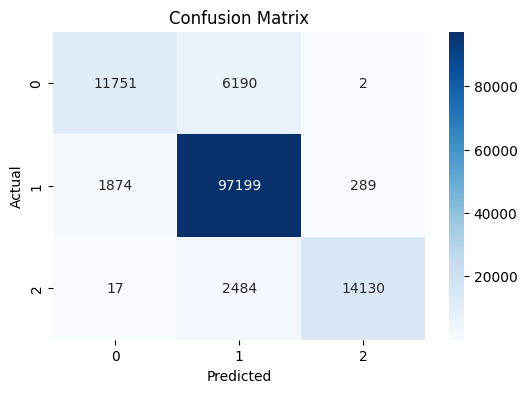

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = svm.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✔ Accuracy:", accuracy)

# 2. Classification Report
print("\n✔ Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
def predict_password_strength(password):
    password_tfidf = tfidf.transform([password])
    pred = svm.predict(password_tfidf)[0]
    labels = {0: "Weak", 1: "Medium", 2: "Strong"}
    return labels[pred]

# Test with user input
user_password = input("Enter a password to test: ")
print("Predicted Strength:", predict_password_strength(user_password))


Enter a password to test: arnav.#4us
Predicted Strength: Strong
